In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Get Data

In [60]:
df = pd.read_csv('/content/sgdata.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,single,67,university,124670,skilled employee / official,2
1,100000002,1,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,2
2,100000003,0,single,49,high school,89210,unemployed / unskilled,0
3,100000004,0,single,45,high school,171565,skilled employee / official,1
4,100000005,0,single,53,high school,149031,skilled employee / official,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


In [62]:
df['Settlement size'].value_counts()

,count
Settlement size,
0,989
1,544
2,467


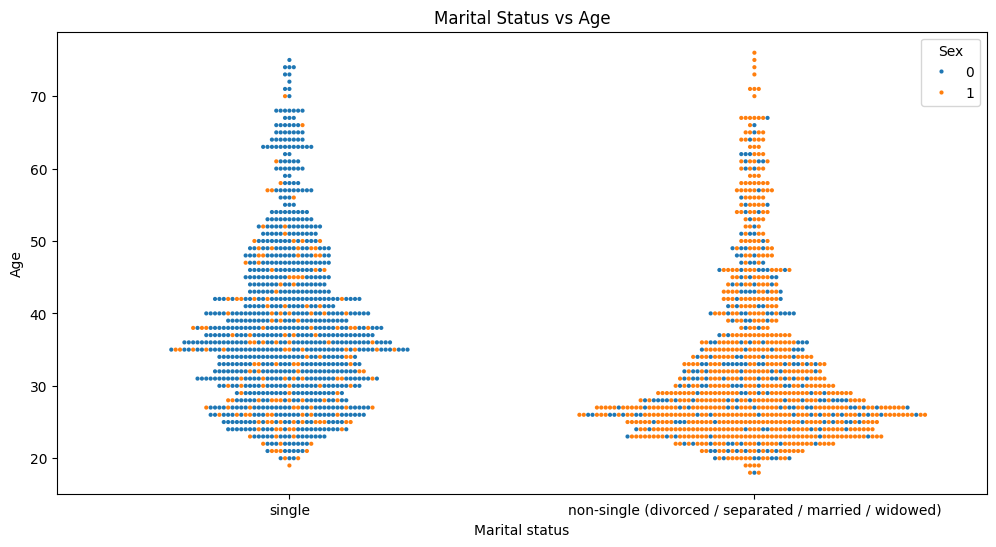

In [63]:
plt.figure(figsize=(12, 6))

sns.swarmplot(df, x = 'Marital status', y = 'Age', size =3, hue = 'Sex')
plt.title('Marital Status vs Age')
plt.show()

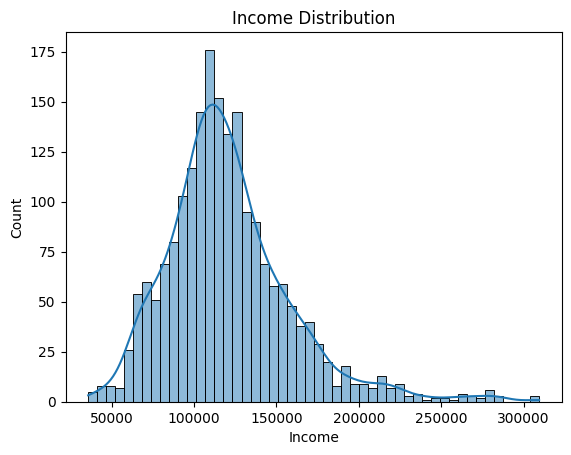

In [64]:
# income distribution
sns.histplot(df, x = 'Income', bins = 50, kde = True)
plt.title('Income Distribution')
plt.show()

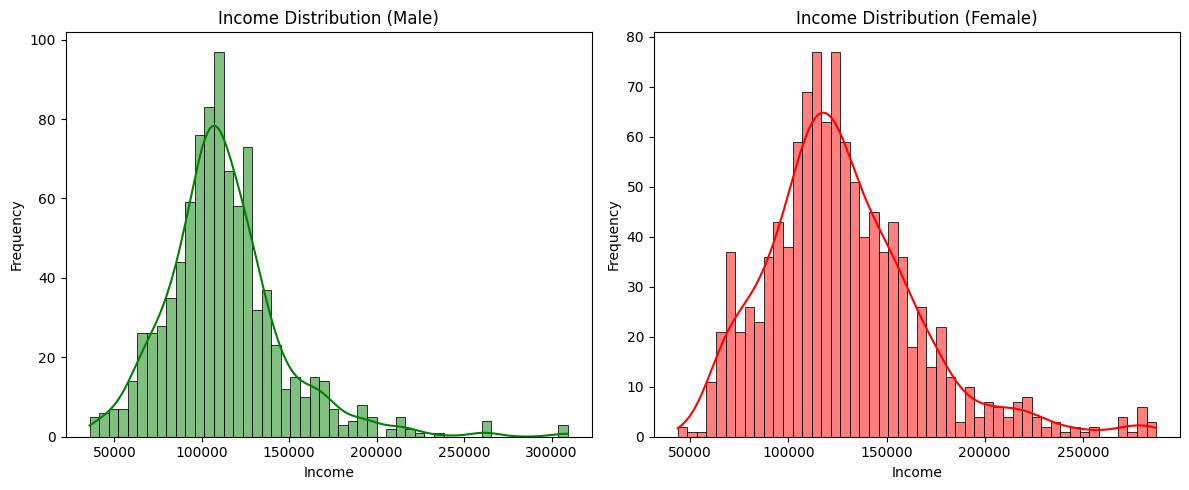

In [65]:
# income distribution by sex
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df[df['Sex'] == 1], x='Income', bins=50, kde=True, ax=axes[0], color = 'green')
axes[0].set_title('Income Distribution (Male)')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df[df['Sex'] == 0], x='Income', bins=50, kde=True, ax=axes[1], color = 'red')
axes[1].set_title('Income Distribution (Female)')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




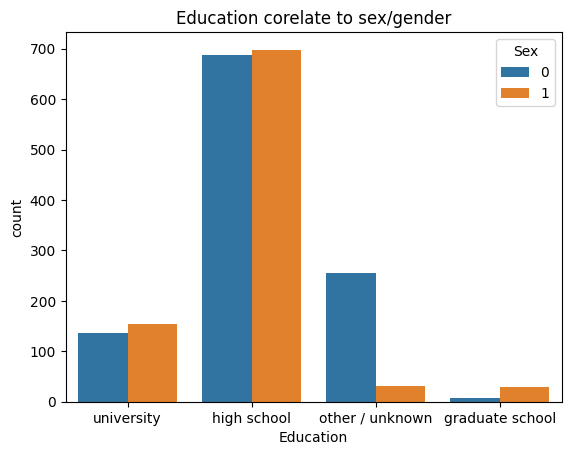

In [66]:
sns.countplot(data=df, x='Education', hue = 'Sex')
plt.title('Education corelate to sex/gender')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

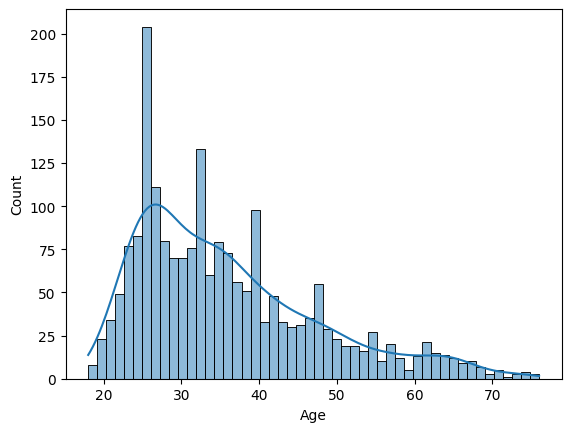

In [67]:
sns.histplot(df, x = 'Age', bins = 50, kde = True)

In [68]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df = df.copy()

for col in ['Marital status', 'Education', 'Occupation']:
  new_df[col] = le.fit_transform(new_df[col])
new_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,1,67,3,124670,1,2
1,100000002,1,0,22,1,150773,1,2
2,100000003,0,1,49,1,89210,2,0
3,100000004,0,1,45,1,171565,1,1
4,100000005,0,1,53,1,149031,1,1


In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


<Axes: >

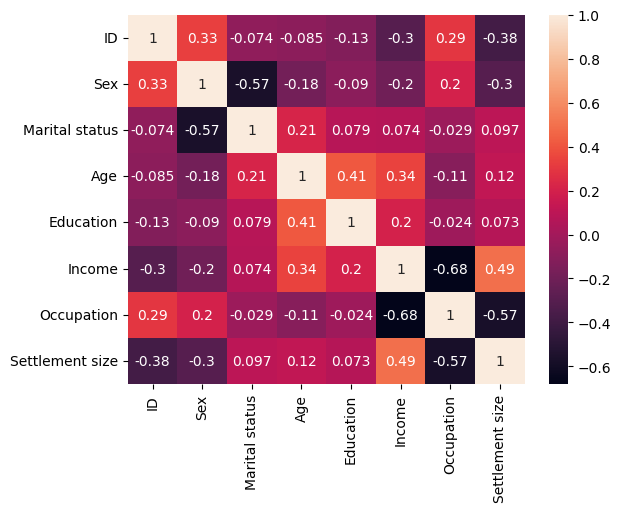

In [70]:
sns.heatmap(new_df.corr(), annot=True)

In [71]:
# log transformastion
new_df['Income'] = np.log1p(new_df['Income'])
new_df['Age'] = np.log1p(new_df['Age'])

new_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,1,4.219508,3,11.733434,1,2
1,100000002,1,0,3.135494,1,11.923537,1,2
2,100000003,0,1,3.912023,1,11.398760,2,0
3,100000004,0,1,3.828641,1,12.052723,1,1
4,100000005,0,1,3.988984,1,11.911916,1,1


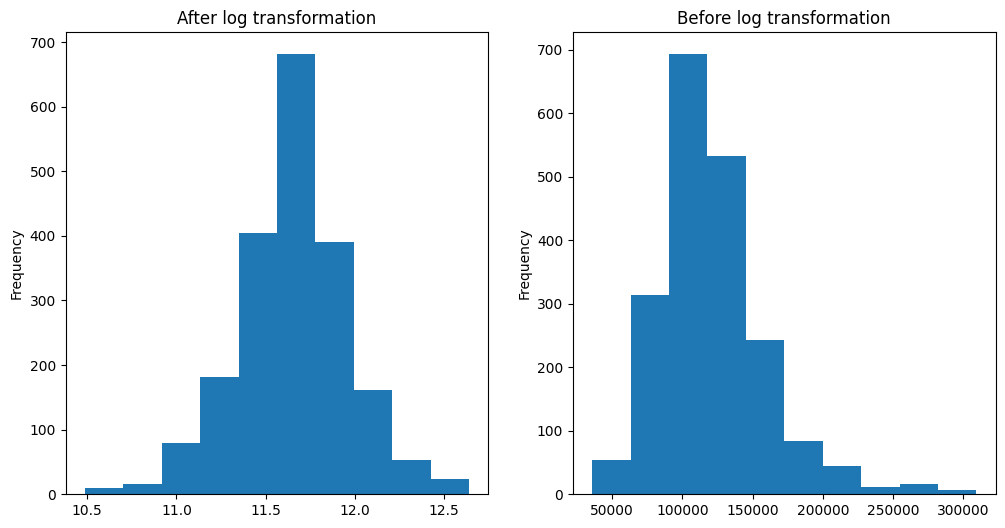

In [72]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
new_df['Income'].plot.hist()
plt.title('After log transformation')

plt.subplot(1, 2, 2)
df['Income'].plot.hist()
plt.title('Before log transformation')

plt.show()

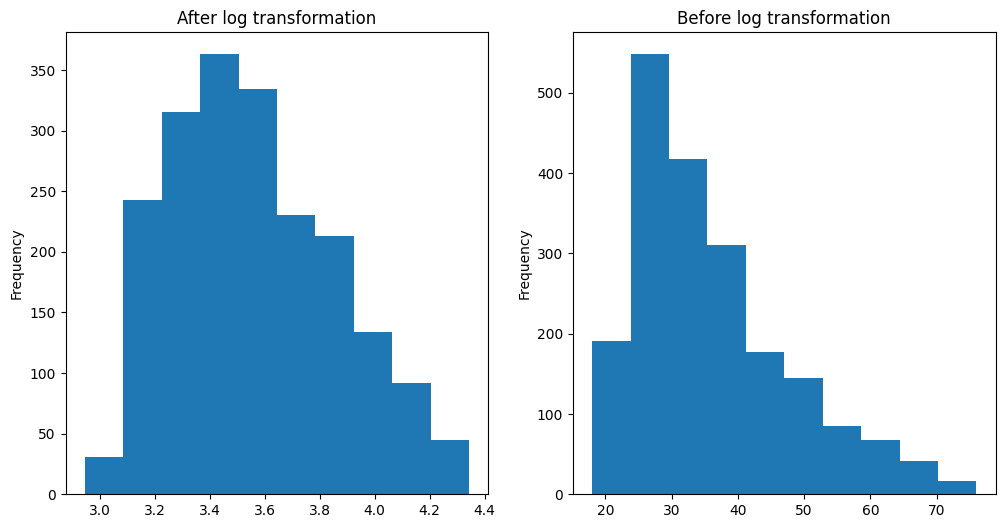

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
new_df['Age'].plot.hist()
plt.title('After log transformation')

plt.subplot(1, 2, 2)
df['Age'].plot.hist()
plt.title('Before log transformation')

plt.show()

In [74]:
# Seperate data feature and data target
X = new_df.drop(['Settlement size', 'ID'], axis=1).values # features
y = new_df['Settlement size'].values # Target



In [75]:
X

array([[ 0.        ,  1.        ,  4.21950771,  3.        , 11.73343355,
         1.        ],
       [ 1.        ,  0.        ,  3.13549422,  1.        , 11.92353731,
         1.        ],
       [ 0.        ,  1.        ,  3.91202301,  1.        , 11.39875963,
         2.        ],
       ...,
       [ 0.        ,  1.        ,  3.4657359 ,  2.        , 11.36675453,
         2.        ],
       [ 1.        ,  0.        ,  3.21887582,  1.        , 11.49240638,
         2.        ],
       [ 0.        ,  1.        ,  3.25809654,  2.        , 11.13337661,
         2.        ]])

In [76]:
y

array([2, 2, 0, ..., 0, 0, 0])

In [77]:
# Train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build model

In [79]:
# Build random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy :',accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.6075
[[168  33  22]
 [ 16  40  37]
 [ 16  33  35]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       223
           1       0.38      0.43      0.40        93
           2       0.37      0.42      0.39        84

    accuracy                           0.61       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.63      0.61      0.62       400



In [80]:
# build Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict
y_pred = xgb.predict(X_test)

# evaluate
print('Accuracy :',accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.625
[[173  29  21]
 [ 14  39  40]
 [ 18  28  38]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       223
           1       0.41      0.42      0.41        93
           2       0.38      0.45      0.42        84

    accuracy                           0.62       400
   macro avg       0.54      0.55      0.55       400
weighted avg       0.65      0.62      0.63       400



In [81]:
# Use SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [82]:
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_train_smote.shape, y_train_smote.shape)

Original dataset shape: (2000, 6) (2000,)
Resampled dataset shape: (2298, 6) (2298,)


In [83]:
# train test split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

In [91]:
# build random forest regression again
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 200, min_samples_leaf= 1, min_samples_split=2)
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# evaluate
print('Accuracy :',accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.7304347826086957
[[116  20  17]
 [ 18 111  26]
 [ 13  30 109]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       153
           1       0.69      0.72      0.70       155
           2       0.72      0.72      0.72       152

    accuracy                           0.73       460
   macro avg       0.73      0.73      0.73       460
weighted avg       0.73      0.73      0.73       460



In [85]:
# build XGBoost classifier again
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict
y_pred = xgb.predict(X_test)

# evaluate
print('Accuracy :',accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.6934782608695652
[[113  23  17]
 [ 16 103  36]
 [ 16  33 103]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       153
           1       0.65      0.66      0.66       155
           2       0.66      0.68      0.67       152

    accuracy                           0.69       460
   macro avg       0.70      0.69      0.69       460
weighted avg       0.70      0.69      0.69       460



In [86]:
# Build SVM Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

# predict
y_pred = svm.predict(X_test)

# evaluate
print('Accuracy :',accuracy_score(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.6391304347826087
[[100  27  26]
 [  9  75  71]
 [  5  28 119]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       153
           1       0.58      0.48      0.53       155
           2       0.55      0.78      0.65       152

    accuracy                           0.64       460
   macro avg       0.67      0.64      0.64       460
weighted avg       0.67      0.64      0.64       460



In [90]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.7201087  0.72554348 0.72554348 0.70027248 0.70844687]
0.715982999644592


In [88]:
# hypertuning parameter
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.7494108174670835
